In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("StudentPerformanceFactors.csv") 
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.shape

(6607, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [33]:
df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)
df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace=True)
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_62184\833783641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_62184\833783641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [9]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

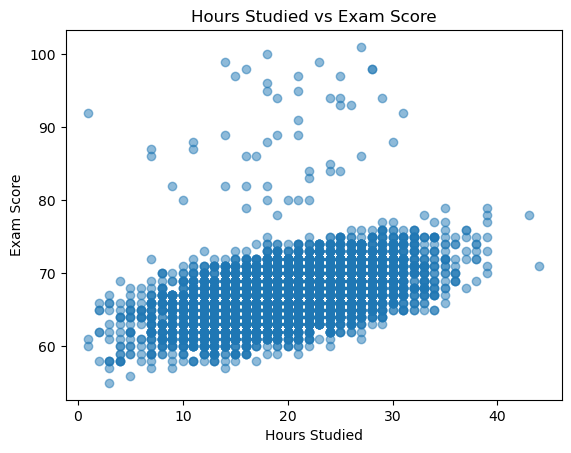

In [10]:
plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.5)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["Hours_Studied"]]  
y = df["Exam_Score"]      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.coef_, model.intercept_


(array([0.28566874]), np.float64(61.511167469044246))

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(10.855921288793322, 0.2319868674542105)

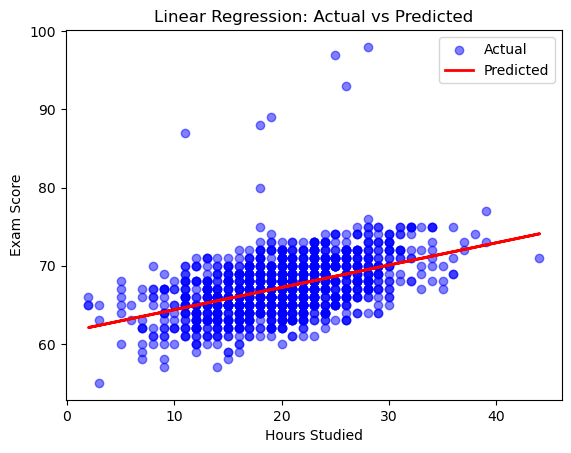

In [14]:
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# split again
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# train model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

# predict
y_pred_poly = poly_reg.predict(X_test_poly)

# evaluate
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

mse_poly, r2_poly


(10.84498813570501, 0.23276034442853466)

D:\ML\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


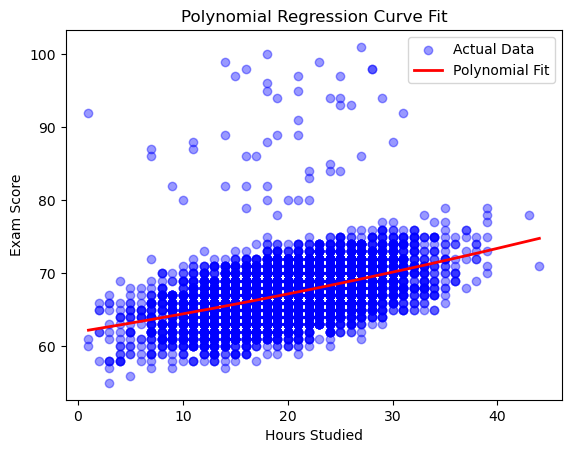

In [17]:
# sort values for smooth curve
X_sorted = np.sort(X, axis=0)
X_poly_sorted = poly.transform(X_sorted)
y_poly_pred_line = poly_reg.predict(X_poly_sorted)

plt.scatter(X, y, color="blue", alpha=0.4, label="Actual Data")
plt.plot(X_sorted, y_poly_pred_line, color="red", linewidth=2, label="Polynomial Fit")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Curve Fit")
plt.legend()
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [27]:
df2 = df.copy()

le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == "object":
        df2[col] = le.fit_transform(df2[col])

In [28]:
X = df2.drop("Exam_Score", axis=1)
y = df2["Exam_Score"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = mlr.predict(X_test)

In [32]:
mse_multi = mean_squared_error(y_test, y_pred)
r2_multi = r2_score(y_test, y_pred)

mse_multi, r2_multi

(4.399275539170953, 0.6887688020307758)